---

In [1]:
#Adrian Hernandez - Capstone

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import ipywidgets as widgets

from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')


In [2]:
# Loading the data using the first column in the .csv file as the index then removing "Unnamed" columns.
data = pd.read_csv('housing_data.csv')
remove_cols = [col for col in data.columns if 'Unnamed' in col]
data.drop(remove_cols, axis='columns', inplace=True)


In [3]:
# START of data exploration analysis.
# The number of rows and columns.
data.shape

(5000, 6)

In [4]:
# Column names.
data.columns

Index(['Area_Income', 'Area_Number_Rooms', 'Area_Number_Bedrooms',
       'Area_Population', 'Area_House_Age', 'Price'],
      dtype='object')

In [5]:
# Returns the first n(5) rows.
data.head()

,Area_Income,Area_Number_Rooms,Area_Number_Bedrooms,Area_Population,Area_House_Age,Price
0,79545.45857,7.009188,4.09,23086.80050,5.682861,1.059034e+06
1,79248.64245,6.730821,3.09,40173.07217,6.002900,1.505891e+06
2,61287.06718,8.512727,5.13,36882.15940,5.865890,1.058988e+06
3,63345.24005,5.586729,3.26,34310.24283,7.188236,1.260617e+06
4,59982.19723,7.839388,4.23,26354.10947,5.040555,6.309435e+05


In [6]:
# Returns the last n(5) rows.
data.tail()

,Area_Income,Area_Number_Rooms,Area_Number_Bedrooms,Area_Population,Area_House_Age,Price
4995,60567.94414,6.137356,3.46,22837.36103,7.830362,1060193.786
4996,78491.27543,6.576763,4.02,25616.11549,6.999135,1482617.729
4997,63390.68689,4.805081,2.13,33266.14549,7.250591,1030729.583
4998,68001.33124,7.130144,5.44,42625.62016,5.534388,1198656.872
4999,65510.58180,6.792336,4.07,46501.28380,5.992305,1298950.480


In [7]:
# Data Cleaning. Checking to see if we have any missing values.
data.isnull().sum()

Area_Income             0
Area_Number_Rooms       0
Area_Number_Bedrooms    0
Area_Population         0
Area_House_Age          0
Price                   0
dtype: int64

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Area_Income           5000 non-null   float64
 1   Area_Number_Rooms     5000 non-null   float64
 2   Area_Number_Bedrooms  5000 non-null   float64
 3   Area_Population       5000 non-null   float64
 4   Area_House_Age        5000 non-null   float64
 5   Price                 5000 non-null   float64
dtypes: float64(6)
memory usage: 234.5 KB


In [9]:
# Showing the statistics for analysis.
data.describe()

,Area_Income,Area_Number_Rooms,Area_Number_Bedrooms,Area_Population,Area_House_Age,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,6.987792,3.981330,36163.516039,5.977222,1.232073e+06
std,10657.991214,1.005833,1.234137,9925.650114,0.991456,3.531176e+05
min,17796.631190,3.236194,2.000000,172.610686,2.644304,1.593866e+04
25%,61480.562390,6.299250,3.140000,29403.928700,5.322283,9.975771e+05
50%,68804.286405,7.002902,4.050000,36199.406690,5.970429,1.232669e+06
75%,75783.338665,7.665871,4.490000,42861.290770,6.650808,1.471210e+06
max,107701.748400,10.759588,6.500000,69621.713380,9.519088,2.469066e+06


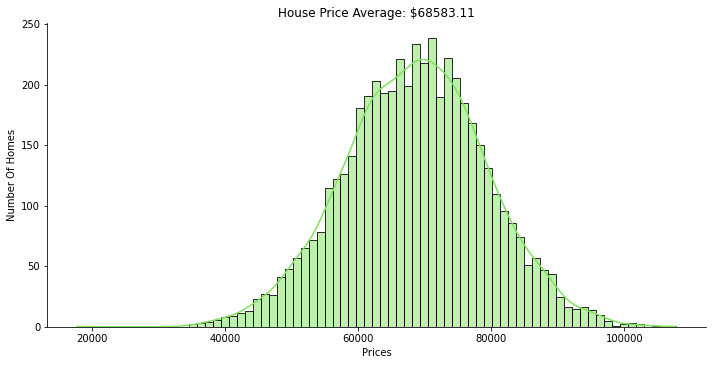

In [10]:
# Average house prices visualized using Seaborn's.displot() to create a bar chart to superimpose the Kernel Density Estimate(KDE).
sns.displot(data['Area_Income'], 
            bins=75, 
            aspect=2,
            kde=True, 
            color='#7fe35d')

plt.title(f'House Price Average: ${data.Area_Income.mean():.2f}')
plt.xlabel('Prices')
plt.ylabel('Number Of Homes')
plt.show()

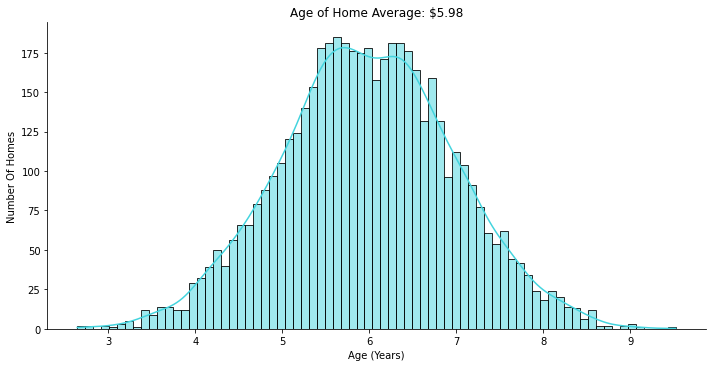

In [11]:
# Average home age visualized using Seaborn's.displot() to create a bar chart to superimpose the Kernel Density Estimate(KDE).
sns.displot(data['Area_House_Age'], 
            bins=75, 
            aspect=2,
            kde=True, 
            color='#43d4de')

plt.title(f'Age of Home Average: ${data.Area_House_Age.mean():.2f}')
plt.xlabel('Age (Years)')
plt.ylabel('Number Of Homes')
plt.show()

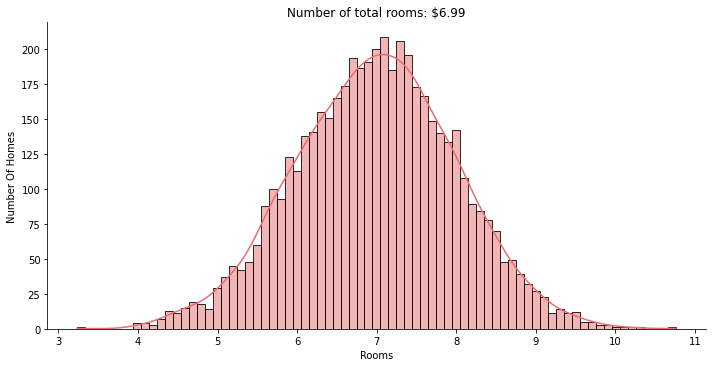

In [12]:
# Average number of total rooms visualized using Seaborn's.displot() to create a bar chart to superimpose the Kernel Density Estimate(KDE).
sns.displot(data['Area_Number_Rooms'], 
            bins=75, 
            aspect=2,
            kde=True, 
            color='#eb6c70')

plt.title(f'Number of total rooms: ${data.Area_Number_Rooms.mean():.2f}')
plt.xlabel('Rooms')
plt.ylabel('Number Of Homes')
plt.show()

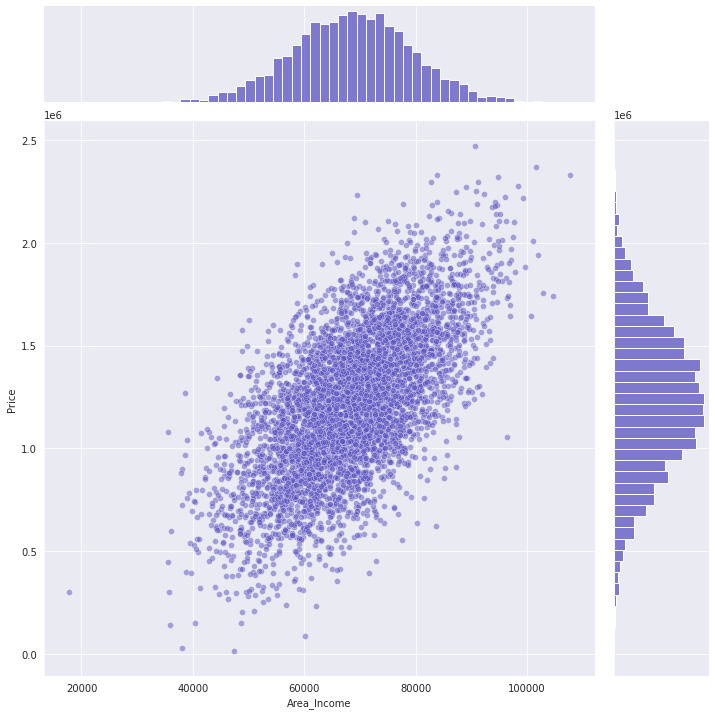

In [13]:
# Using Seaborn's.jointplot() to view the relationship between Area_income vs Price of homes.
with sns.axes_style('darkgrid'):
  sns.jointplot(x=data.Area_Income, 
                y=data.Price, 
                # kind='hex', 
                height=10, 
                color='#5b53c2',
                joint_kws={'alpha':.5})
plt.show()

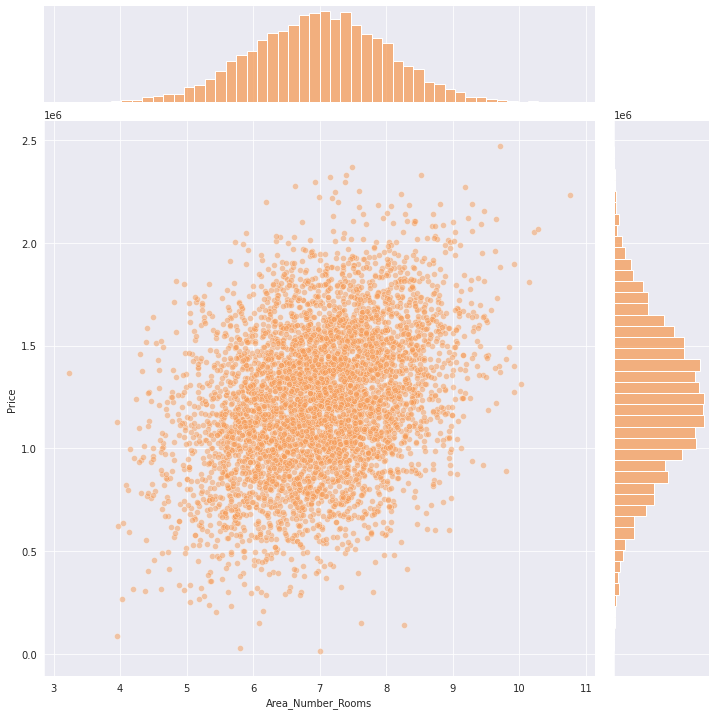

In [14]:
# Using Seaborn's.jointplot() to view the relationship between Area_Number_Rooms vs Price of homes.
with sns.axes_style('darkgrid'):
  sns.jointplot(x=data.Area_Number_Rooms, 
                y=data.Price, 
                # kind='hex', 
                height=10, 
                color='#f59c58',
                joint_kws={'alpha':.5})
plt.show()

array([[<AxesSubplot:xlabel='Area_Income', ylabel='Area_Income'>,
        <AxesSubplot:xlabel='Area_Number_Rooms', ylabel='Area_Income'>,
        <AxesSubplot:xlabel='Area_Number_Bedrooms', ylabel='Area_Income'>,
        <AxesSubplot:xlabel='Area_Population', ylabel='Area_Income'>,
        <AxesSubplot:xlabel='Area_House_Age', ylabel='Area_Income'>,
        <AxesSubplot:xlabel='Price', ylabel='Area_Income'>],
       [<AxesSubplot:xlabel='Area_Income', ylabel='Area_Number_Rooms'>,
        <AxesSubplot:xlabel='Area_Number_Rooms', ylabel='Area_Number_Rooms'>,
        <AxesSubplot:xlabel='Area_Number_Bedrooms', ylabel='Area_Number_Rooms'>,
        <AxesSubplot:xlabel='Area_Population', ylabel='Area_Number_Rooms'>,
        <AxesSubplot:xlabel='Area_House_Age', ylabel='Area_Number_Rooms'>,
        <AxesSubplot:xlabel='Price', ylabel='Area_Number_Rooms'>],
       [<AxesSubplot:xlabel='Area_Income', ylabel='Area_Number_Bedrooms'>,
        <AxesSubplot:xlabel='Area_Number_Rooms', ylabel='Area_N

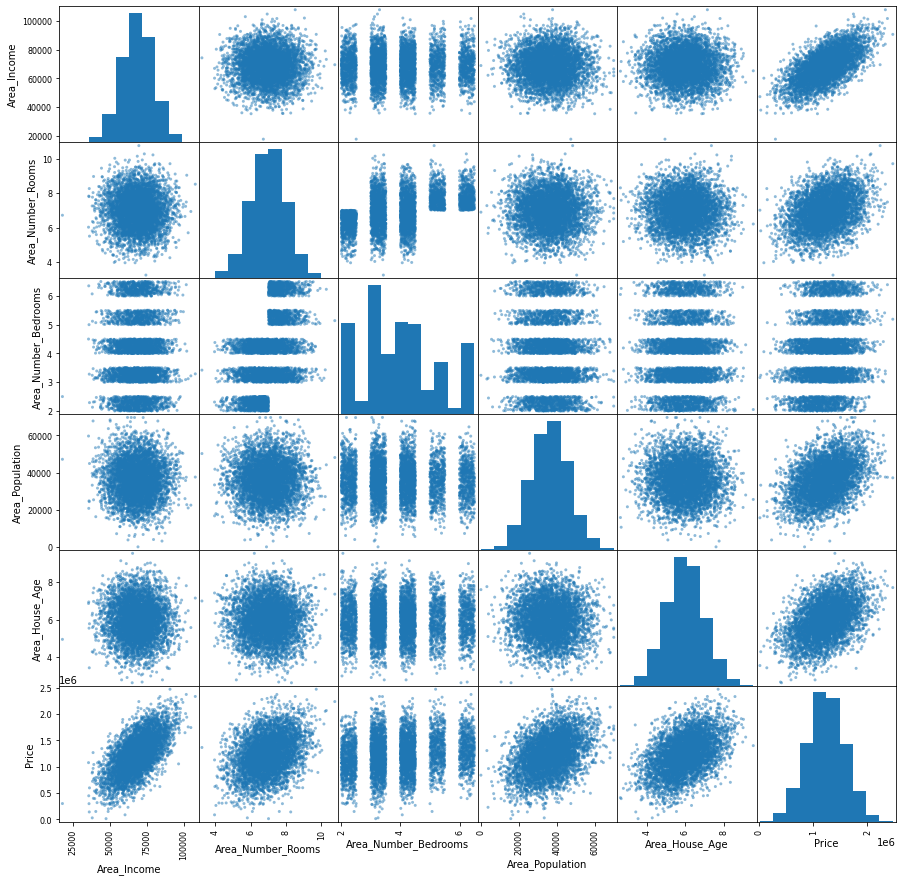

In [15]:
# Plotting all variables together to see if there's a pattern.
pd.plotting.scatter_matrix(data, figsize=(15,15))

<AxesSubplot:>

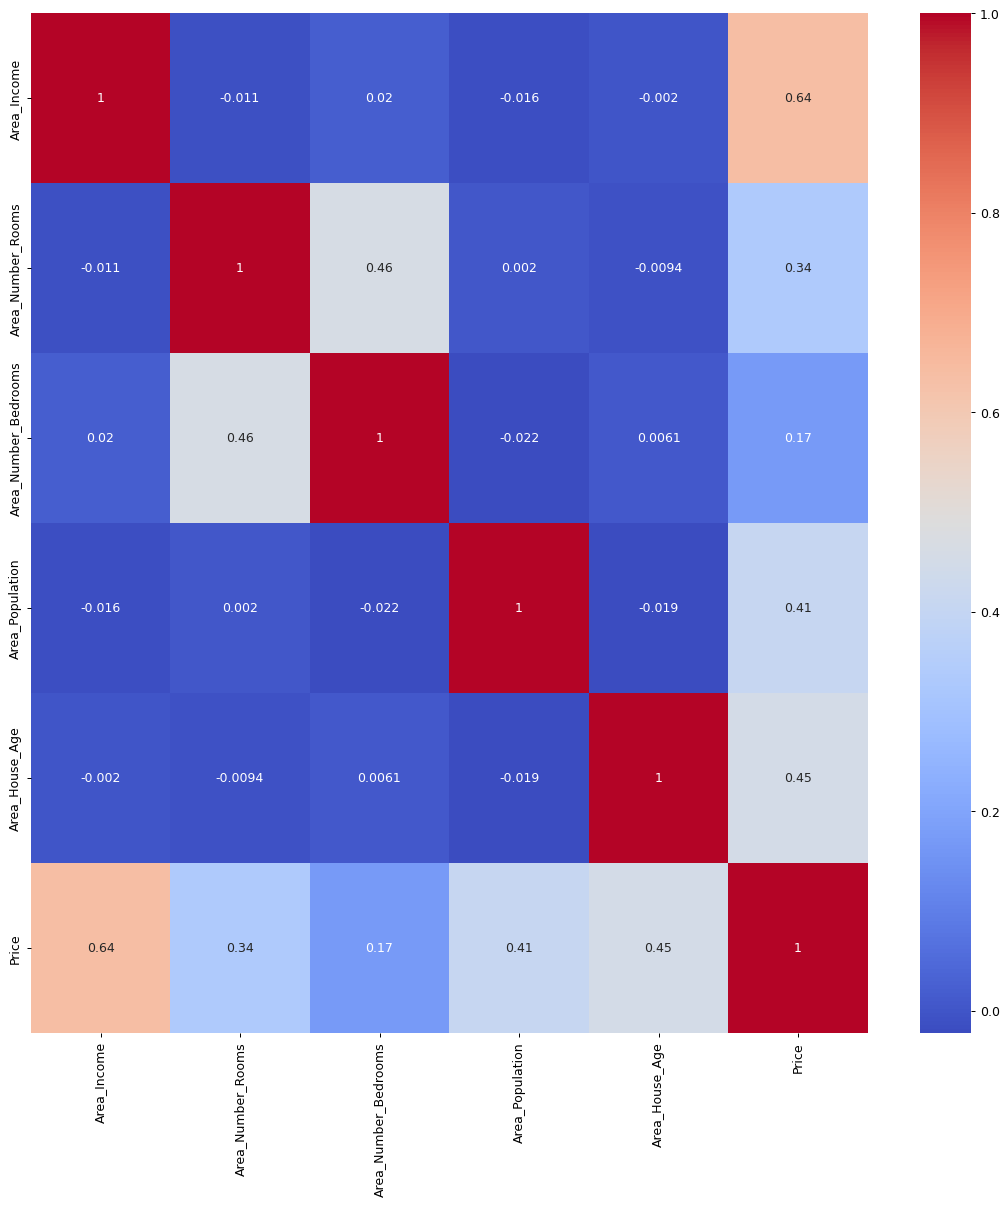

In [16]:
# Using a heatmap to analyze the correlation between all variables.
heat=data.corr()
plt.figure(figsize=(15,15),dpi=90)
sns.heatmap(heat,annot=True,cmap='coolwarm')


In [17]:
# Splitting our dataframes to x and y.
X = data.drop(columns=(['Price']))
y = data[['Price']]

In [18]:
# Splitting the data into training and test sets using a 70/30 ratio.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=12, shuffle=True)


In [19]:
# Using the RandomForest regression model for our data product and below fitting.
regr = RandomForestRegressor(n_estimators=150, random_state=42)
X_train = np.nan_to_num(X_train)
y_train = np.nan_to_num(y_train)
regr.fit(X_train,y_train)

RandomForestRegressor(n_estimators=150, random_state=42)

In [20]:
data.head()

,Area_Income,Area_Number_Rooms,Area_Number_Bedrooms,Area_Population,Area_House_Age,Price
0,79545.45857,7.009188,4.09,23086.80050,5.682861,1.059034e+06
1,79248.64245,6.730821,3.09,40173.07217,6.002900,1.505891e+06
2,61287.06718,8.512727,5.13,36882.15940,5.865890,1.058988e+06
3,63345.24005,5.586729,3.26,34310.24283,7.188236,1.260617e+06
4,59982.19723,7.839388,4.23,26354.10947,5.040555,6.309435e+05


In [21]:
# Evaluating the regression model used.
prediction = regr.predict(X_test)

In [22]:
# Difference between the measured value and the "True" value.
meanabs = metrics.mean_absolute_error(y_test, prediction)
print(f'Mean absolute error: {meanabs:.3f}')

Mean absolute error: 97615.692


In [23]:
# Calc_prediction receives inputs from dataset and through regression analysis outputs a home estimate based on criteria selected. 
def calc_prediction(Area_income, House_age, Total_rooms, Total_bedrooms, Area_pop):
    new_house_predict = regr.predict([[
        Area_income.value, 
        House_age.value, 
        Total_rooms.value, 
        Total_bedrooms.value, 
        Area_pop.value,]])
    return new_house_predict

In [24]:
# The widget Int.sliders gather input and are then passed over to calc_prediction with the button press.
Area_income = widgets.IntSlider(min=1, max=250000, step=1, description='Area Income')
House_age = widgets.IntSlider(min=1, max=10, step=1, description='Home Age')
Total_rooms = widgets.IntSlider(min=1, max=10, step=1, description='Total Rooms')
Total_bedrooms = widgets.IntSlider(min=1, max=10, step=1, description='Bedrooms')
Area_pop = widgets.IntSlider(min=1, max=100000, step=1, description='Area Population')

# Initialize the widget_box and add the children for tab.
widget_box = widgets.VBox([Area_income, House_age, Total_rooms, Total_bedrooms, Area_pop])
children = [widget_box]

# Initialize the tab and set the children.
tab = widgets.Tab()
tab.children = children

# The box title.
tab.set_title(0, 'House Criteria')
tab

In [25]:
# Linking the function with the output. out.clear_output() prints out when we press the button.
def button_click(_):
    prediction_out = int(calc_prediction(Area_income, House_age, Total_rooms, Total_bedrooms, Area_pop))
    
    with out:
        out.clear_output()
        print("--- House Estimate ---")
        print("The data model predicts ${:.0f} dollars for a home with these features.".format(prediction_out))
        
    return

# calc_prediction button gathers input from the sliders. Then attaches the button and function together using button method.
# Displayed is the button and output joined.
button_calc = widgets.Button(description='Calculate')
out = widgets.Output()

button_calc.on_click(button_click)

widgets.VBox([button_calc,out])